In [1]:
library(Metrics)
library(fpp2)
library(tscompdata)
library(ggplot2)
library(forecast)
library(grid)
library(gridExtra)
library(dplyr)

setwd("/Users/willychien/Desktop/AF/kdata") 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

─ Attaching packages ─────────────────────── fpp2 2.4 ─

✔ ggplot2   3.3.2     ✔ fma       2.4  
✔ forecast  8.13      ✔ expsmooth 2.3  

─ Conflicts ───────────────────────── fpp2_conflicts ─
✖ forecast::accuracy() masks Metrics::accuracy()

Loading required package: Mcomp

Loading required package: Tcomp



In [486]:
# Import the processed dataset (processed with Pyhton)

train <- read.csv("processed_train.csv")
head(train)

,X,id,day,demand,date,wm_yr_wk_x,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,item_id,sell_price
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
1,0,HOBBIES_2_002_CA_3_validation,d_1,0,2011-01-29,11101,Saturday,1,1,2011,,,,,0,HOBBIES_2_002,1.97
2,1,HOBBIES_2_002_CA_3_validation,d_2,0,2011-01-30,11101,Sunday,2,1,2011,,,,,0,HOBBIES_2_002,1.97
3,2,HOBBIES_2_002_CA_3_validation,d_3,0,2011-01-31,11101,Monday,3,1,2011,,,,,0,HOBBIES_2_002,1.97
4,3,HOBBIES_2_002_CA_3_validation,d_4,1,2011-02-01,11101,Tuesday,4,2,2011,,,,,1,HOBBIES_2_002,1.97
5,4,HOBBIES_2_002_CA_3_validation,d_5,0,2011-02-02,11101,Wednesday,5,2,2011,,,,,1,HOBBIES_2_002,1.97
6,5,HOBBIES_2_002_CA_3_validation,d_6,1,2011-02-03,11101,Thursday,6,2,2011,,,,,1,HOBBIES_2_002,1.97


In [495]:
# Split into training and validation set (only for evalutating the RMSE in validation)

data_list <- list()
train_list <- list()
test_list <- list()

for (i in seq(1,149)){
    data_list[[i]] <- ts(train[train['id'] == item[[1]][[i]], 'demand'], frequency=365, start=c(2011,1,29))
    train_list[[i]] <- head(data_list[[i]], n = 1913)
    test_list[[i]] <- tail(data_list[[i]], n = 28)}

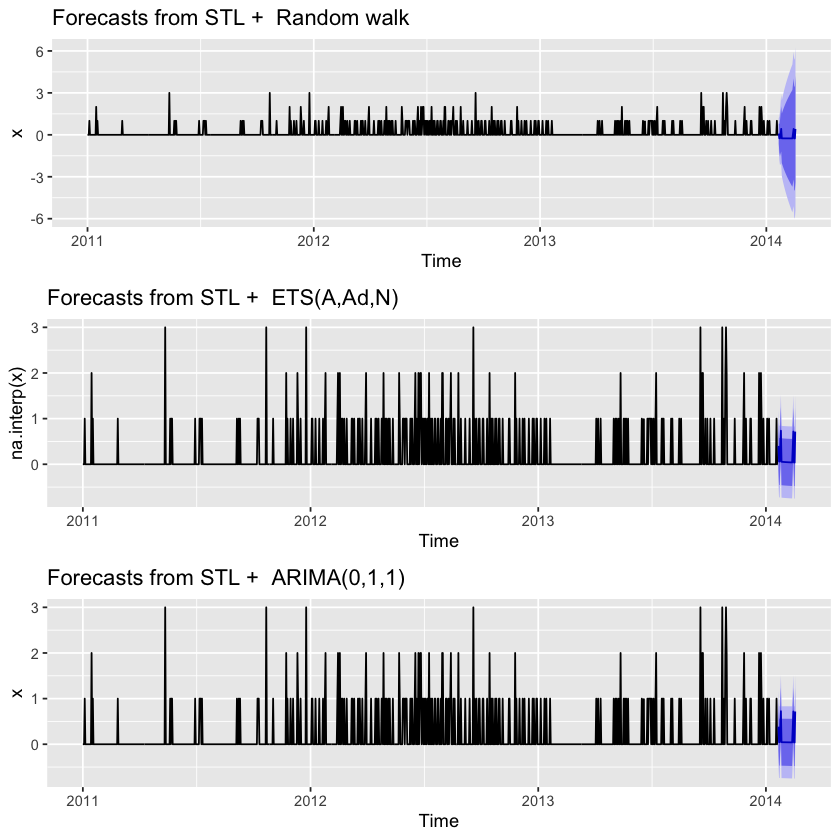

In [476]:
pred1 <- train_list[[111]] %>% mstl() %>% forecast(method = "naive", h = 28) %>% autoplot()
pred2 <- train_list[[111]] %>% mstl() %>% forecast(method = "ets", h = 28, damped=TRUE) %>% autoplot()
pred3 <- train_list[[111]] %>% mstl() %>% forecast(h=28, method="arima") %>% autoplot()

grid.arrange(pred1, pred2, pred3)

In [509]:
# Moving Average 

ma_pred <- list()
ma_df <- list()
rmse_ma <- list()

for (i in seq(1, 149)){
    
    ma_pred[[i]] <- ma(train_list[[i]], 5) %>% forecast(h=28)
    rmse_ma[[i]] <- rmse(as.numeric(ma_pred[[i]][[2]]), as.numeric(test_list[[i]]))
    method <- "Moving Average"
    item <- i    
    ma_df[[i]] <- data.frame(method, item, ma_pred[[i]])
    

Warning message in ets(object, model = "ZZN", lambda = lambda, biasadj = biasadj, :
“Missing values encountered. Using longest contiguous portion of time series”
Warning message in ets(object, model = "ZZN", lambda = lambda, biasadj = biasadj, :
“Missing values encountered. Using longest contiguous portion of time series”
Warning message in ets(object, model = "ZZN", lambda = lambda, biasadj = biasadj, :
“Missing values encountered. Using longest contiguous portion of time series”
Warning message in ets(object, model = "ZZN", lambda = lambda, biasadj = biasadj, :
“Missing values encountered. Using longest contiguous portion of time series”
Warning message in ets(object, model = "ZZN", lambda = lambda, biasadj = biasadj, :
“Missing values encountered. Using longest contiguous portion of time series”
Warning message in ets(object, model = "ZZN", lambda = lambda, biasadj = biasadj, :
“Missing values encountered. Using longest contiguous portion of time series”
Warning message in ets(objec

In [511]:
# Examine the predictions 

head(ma_df[1])

,method,item,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016.2411,Moving Average,1,0.03688835,-0.08533896,0.1591157,-0.1500422,0.2238189
2016.2438,Moving Average,1,0.12639235,-0.04645441,0.2992391,-0.1379540,0.3907387
2016.2466,Moving Average,1,0.21383067,0.00214106,0.4255203,-0.1099207,0.5375820
2016.2493,Moving Average,1,0.21382495,-0.03061109,0.4582610,-0.1600077,0.5876576
2016.2521,Moving Average,1,0.25858278,-0.01470364,0.5318692,-0.1593727,0.6765383
2016.2548,Moving Average,1,0.25857706,-0.04079220,0.5579463,-0.1992687,0.7164228
2016.2575,Moving Average,1,0.21174211,-0.11161287,0.5350971,-0.2827867,0.7062709
2016.2603,Moving Average,1,0.16877672,-0.17690366,0.5144571,-0.3598958,0.6974493
2016.2630,Moving Average,1,0.16877099,-0.19787791,0.5354199,-0.3919701,0.7295121


In [515]:
# Check the RMSE

mean(as.numeric(rmse_ma))

[1] 0.8872696

In [451]:
# Seasonal ARIMA 

arima_pred <- list()
arima_df <- list()
rmse_arima <- list()

for (i in seq(1, 149)){
    
    arima_pred[[i]] <- data_list[[i]] %>% auto.arima() %>% forecast(h=28)
    rmse_arima[[i]] <- rmse(as.numeric(arima_pred[[i]][[4]]), as.numeric(test_list[[i]]))
    method <- "ARIMA"
    item <- i    
    arima_df[[i]] <- data.frame(method, item, arima_pred[[i]][[4]])

}

Warning message:
“The chosen seasonal unit root test encountered an error when testing for the first difference.
From stl(): series is not periodic or has less than two periods
0 seasonal differences will be used. Consider using a different unit root test.”
Warning message:
“The chosen seasonal unit root test encountered an error when testing for the first difference.
From stl(): series is not periodic or has less than two periods
0 seasonal differences will be used. Consider using a different unit root test.”
Warning message:
“The chosen seasonal unit root test encountered an error when testing for the first difference.
From stl(): series is not periodic or has less than two periods
0 seasonal differences will be used. Consider using a different unit root test.”
Warning message:
“The chosen seasonal unit root test encountered an error when testing for the first difference.
From stl(): series is not periodic or has less than two periods
0 seasonal differences will be used. Consider usi

In [512]:
# Examine the predictions 
arima_df[1]

method,item,arima_pred..i....4..
<chr>,<int>,<ts>
ARIMA,1,0.1719976
ARIMA,1,0.1647646
ARIMA,1,0.1696340
ARIMA,1,0.1712720
ARIMA,1,0.1732597
ARIMA,1,0.1737513
ARIMA,1,0.1748244
ARIMA,1,0.1750832
ARIMA,1,0.1756220


In [516]:
# Check the RMSE

mean(as.numeric(rmse_arima))

[1] 0.841402

In [510]:
# Merge all the dataframe into one

final.df <- do.call(rbind, ma_df)

write.csv(final.df, "ma_result.csv")

,method,item,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016.2411,Moving Average,1,0.03688835,-0.08533896,0.1591157,-0.15004219,0.2238189
2016.2438,Moving Average,1,0.12639235,-0.04645441,0.2992391,-0.13795396,0.3907387
2016.2466,Moving Average,1,0.21383067,0.00214106,0.4255203,-0.10992065,0.5375820
2016.2493,Moving Average,1,0.21382495,-0.03061109,0.4582610,-0.16000772,0.5876576
2016.2521,Moving Average,1,0.25858278,-0.01470364,0.5318692,-0.15937273,0.6765383
2016.2548,Moving Average,1,0.25857706,-0.04079220,0.5579463,-0.19926872,0.7164228
2016.2575,Moving Average,1,0.21174211,-0.11161287,0.5350971,-0.28278666,0.7062709
2016.2603,Moving Average,1,0.16877672,-0.17690366,0.5144571,-0.35989581,0.6974493
2016.2630,Moving Average,1,0.16877099,-0.19787791,0.5354199,-0.39197012,0.7295121
